In [59]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from spikeHelper.dataOrganization import trialToXyT,getX
import pickle
%matplotlib inline

In [54]:
data = pickle.load(open('Data/50ms_r10_1000msPlus.pickle','rb'))

endingDS = data[:,10:,-100:]
beginningDS = data[:,10:,:50]

In [55]:
endData = trialToXyT(endingDS)
begData = trialToXyT(beginningDS)

In [60]:
pcend = PCA()
endPca = pcend.fit_transform(getX(endData))

pcbeg = PCA()
begPca = pcbeg.fit_transform(getX(begData))

In [61]:
endPca.shape

(1000, 37)

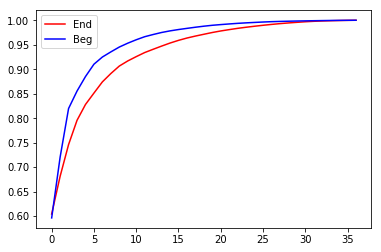

In [62]:
plt.plot(pcend.explained_variance_ratio_.cumsum(), 'r', label='End')
plt.plot(pcbeg.explained_variance_ratio_.cumsum(), 'b', label='Beg')
plt.legend(loc='upper left')

In [9]:
data = loadmat('normbin_r10.mat')['C']
data = np.nan_to_num(np.swapaxes(data,0,2))
print(data.shape)

data = trialToXyT(data[:40,:20,:])


(69, 21, 634)


In [10]:
data['X'].shape

(12680, 40)

In [11]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
sne = TSNE()

In [12]:
interm = lda.fit_transform(data['X'],data['y'])

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [13]:
interm.shape

(12680, 19)

In [ ]:
visual = sne.fit_transform(data['X'],data['y'])

In [ ]:
cm = plt.get_cmap('inferno')
NUM_COLORS = 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for time in range(8):
    plt.plot(visual[data['y']==time,0],visual[data['y']==time,1],'.')